In [2]:
!pip install matplotlib


  Using cached matplotlib-3.8.2-cp39-cp39-win_amd64.whl (7.6 MB)
     ---------------------------------------- 2.6/2.6 MB 2.1 MB/s eta 0:00:00
  Using cached contourpy-1.2.0-cp39-cp39-win_amd64.whl (181 kB)
  Using cached pyparsing-3.1.1-py3-none-any.whl (103 kB)
  Using cached fonttools-4.47.0-cp39-cp39-win_amd64.whl (2.2 MB)
  Using cached importlib_resources-6.1.1-py3-none-any.whl (33 kB)
  Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
  Using cached kiwisolver-1.4.5-cp39-cp39-win_amd64.whl (56 kB)



[notice] A new release of pip available: 22.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import matplotlib.pyplot as plt
import os

# Replace 'animals_path' with the actual path to your data directory
animals_path = "./animal_dataset"

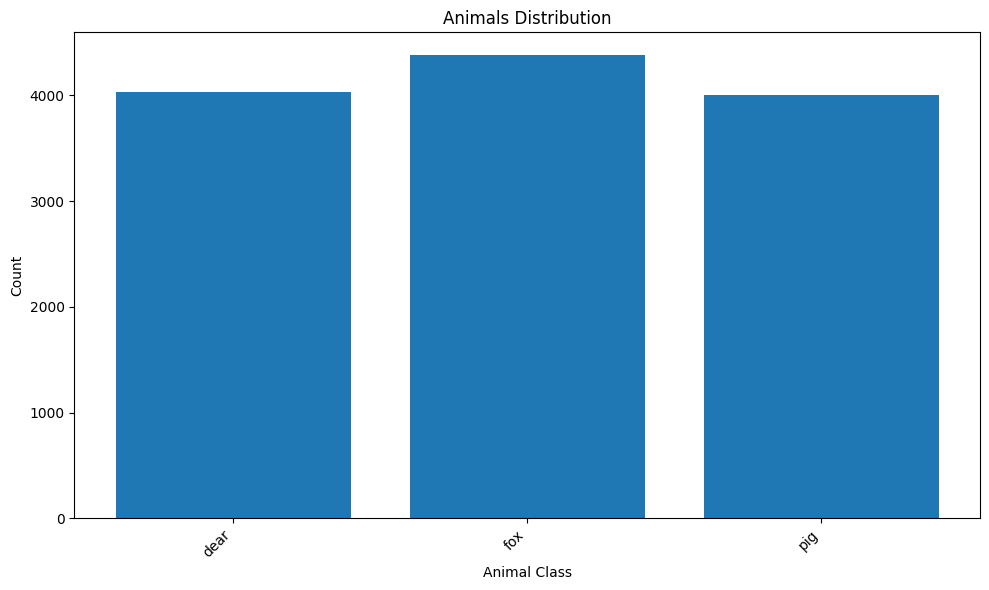

In [4]:
# Create lists to store animal class labels and counts
animal_labels = []
animal_counts = []

# Populate the lists with data
for o in os.listdir(animals_path):
    animal_labels.append(o)
    animal_counts.append(len(os.listdir(os.path.join(animals_path, o))))

# Create a bar plot to display the distribution
plt.figure(figsize=(10, 6))
plt.bar(animal_labels, animal_counts)
plt.title("Animals Distribution")
plt.xlabel("Animal Class")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")

# Show the plot
plt.tight_layout()
plt.show()


In [6]:
import math 
import re 
import sys
from sklearn.preprocessing import LabelEncoder
from PIL import Image
sys.modules['Image'] = Image
import shutil
train_val_test_ratio= (0.9,0.1)
test_folder = 'test/'
train_folder ='train/'
val_folder = 'val/'
file_names = os.listdir(animals_path)

In [205]:

# Remove existing folders if they exist 
for folder in [test_folder,train_folder,val_folder]:
    if os.path.exists(folder) and os.path.exists(folder):
        shutil.rmtree(folder)

# Remake category folders in both Train and Test Folders

for category in file_names:
    os.makedirs(test_folder+category)
    os.makedirs(train_folder+category)
    os.makedirs(val_folder+category)


In [207]:
import random  
#Split Data by Train Ratio and copy files to correct directory 
for idx, category in enumerate(file_names):
    file_list = os.listdir(animals_path + '/' + category)
    random.shuffle(file_list)
    train_ratio = math.floor(len(file_list) * train_val_test_ratio[0])
    val_ratio = math.floor(len(file_list) * train_val_test_ratio[1])
    train_list = file_list[:train_ratio]
    val_list = file_list[train_ratio:train_ratio + val_ratio]
    test_list = []
    
    for i, file in enumerate(train_list):
        shutil.copy(animals_path + '/' + category + '/' + file, train_folder + '/' + category + '/' + file)
        
    sys.stdout.write('Moving %d train images to category folder %s' % (len(train_list), category)) 
    sys.stdout.write('\n')
    
    for i, file in enumerate(val_list):
        shutil.copy(animals_path + '/' + category + '/' + file, val_folder + '/' + category + '/' + file)
        
    sys.stdout.write('Moving %d validation images to category folder %s' % (len(val_list), category)) 
    sys.stdout.write('\n')
    
    for i, file in enumerate(test_list):
        shutil.copy(animals_path + '/' + category + '/' + file, test_folder + '/' + category + '/' + file)
        
    sys.stdout.write('Moving %d test images to category folder %s' % (len(test_list), category)) 
    sys.stdout.write('\n')
    
print("Done")


KeyboardInterrupt: 

In [7]:
from datetime import datetime


def accuracy_loss_plot(history, model_config):
    epochs = history.epoch
    tr_acc = history.history['accuracy']
    tr_loss = history.history['loss']
    val_acc = history.history['val_accuracy']
    val_loss = history.history['val_loss']
    run_epochs = len(epochs)

    f = int(input('Enter save plot frequency of metrics: '))
    save_epochs = [epochs[i] for i in range(0, run_epochs, f)]
    save_tr_acc = [tr_acc[i] for i in range(0, run_epochs, f)]
    save_tr_loss = [tr_loss[i] for i in range(0, run_epochs, f)]
    save_val_acc = [val_acc[i] for i in range(0, run_epochs, f)]
    save_val_loss = [val_loss[i] for i in range(0, run_epochs, f)]

    # Create a figure and axis
    fig, ax1 = plt.subplots()

    fig.set_figheight(12)
    fig.set_figwidth(24)

    # Plot accuracy lines
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Accuracy', color='black')
    ax1.plot(save_epochs, save_tr_acc, color='#800000', marker='o', label='Training Accuracy')
    ax1.plot(save_epochs, save_val_acc, color='#000075', marker='x', label='Validation Accuracy')
    # ax1.set_xticklabels(save_epochs, rotation=90)

    # Create a second y-axis for loss lines
    ax2 = ax1.twinx()  # Share the same x-axis
    ax2.set_ylabel('Loss', color='black')
    ax2.plot(save_epochs, save_tr_loss, color='#3cb44b', marker='s', label='Training Loss')
    ax2.plot(save_epochs, save_val_loss, color='#f58231', marker='^', label='Validation Loss')
    ax2.tick_params(axis='y', labelcolor='black')

    # Add a legend
    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines + lines2, labels + labels2, loc='best')

    # Set a title
    plt.title('Accuracy and Loss Over Epochs')

    accuracy_matrices_path = os.path.join(os.getcwd(), './metrics/accuracy_matrices')

    curr_datetime = datetime.now().strftime("%d-%m-%Y-%H-%M-%S")
    filename = f'{"model_name".lower()}-{model_config}-training_metrics_plot-{format(curr_datetime)}.png'

    if not os.path.exists(accuracy_matrices_path):
        os.makedirs(accuracy_matrices_path)

    # Save the plot to the specified folder
    destination = os.path.join(accuracy_matrices_path, filename)
    plt.savefig(destination, bbox_inches='tight')

In [8]:
import random
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

# importing the library for data augmentation
def data_augment(data_dir):
    list_of_images = os.listdir(data_dir)

    datagen = ImageDataGenerator(
        zoom_range=0.5,
        horizontal_flip=True,
        fill_mode="nearest"
    )

    for img_name in list_of_images:
        tmp_img_name = os.path.join(data_dir, img_name)

        try:
            img = load_img(tmp_img_name)
            img = img_to_array(img)
            img = img.reshape((1,) + img.shape)
            #The flow function of this object generates batches of augmented data based on the provided parameters.
            batch = datagen.flow(
                img,
                batch_size=1, #processing one image at a time for augmentation.
                seed=21,
                save_to_dir=data_dir,
                save_prefix=img_name.split(".JPG")[0] + "augmented",
                save_format="JPG"
            )
            batch.next() # generates the augmented version of the current image within the loop.

        except Exception as e:
            print(f"Error processing image {img_name}: {str(e)}")


In [9]:
classes_to_augment = [
    "dear", "fox","pig"
]

In [212]:
for class_name in classes_to_augment:
    print("Augmentation process happening:", class_name)
    data_dir= os.path.join(train_folder,class_name)
    data_augment(data_dir)
    


Augmentation process happening: dear
Augmentation process happening: fox
Augmentation process happening: pig


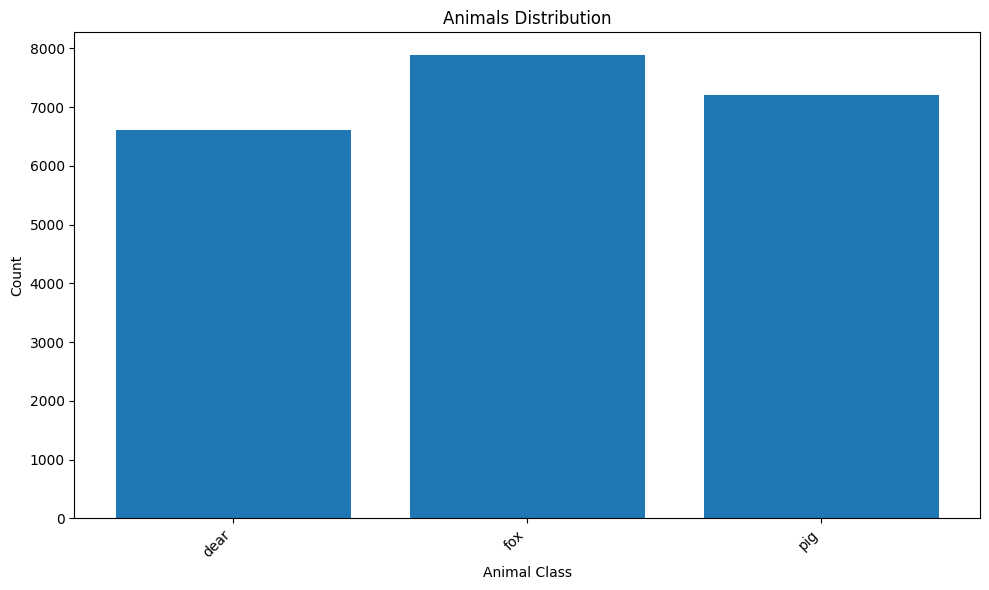

In [10]:
import matplotlib.pyplot as plt
import os

path = "./train"

# Create lists to store animal class labels and counts
animal_labels = []
animal_counts = []

# Populate the lists with data
for o in os.listdir(path):
    animal_labels.append(o)
    animal_counts.append(len(os.listdir(os.path.join(path, o))))

# Create a bar plot to display the distribution
plt.figure(figsize=(10, 6))
plt.bar(animal_labels, animal_counts)
plt.title("Animals Distribution")
plt.xlabel("Animal Class")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")

# Show the plot
plt.tight_layout()
plt.show()


In [11]:
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.mobilenet import preprocess_input as mobilenet_preprocess_input

# Constants for MobileNet
MOBILENET_WIDTH = 224
MOBILENET_HEIGHT = 224
BATCH_SIZE = 64
test_dir = 'test/'
train_dir = 'train/'
val_dir = 'val/'

In [12]:
# Train Dataset Generator with Augmentation for MobileNet
print("\nTraining Data Set for MobileNet")
train_generator_mobilenet = ImageDataGenerator(preprocessing_function=mobilenet_preprocess_input)
#  preprocessing_function parameter is set to mobilenet_preprocess_input, which is likely a function used to preprocess images specifically for the MobileNet model.

#generates a flow of augmented/processed image data from a directory. It creates a generator named train_flow_mobilenet 

train_flow_mobilenet = train_generator_mobilenet.flow_from_directory(
    train_dir, 
    target_size=(MOBILENET_HEIGHT, MOBILENET_WIDTH),
    batch_size=BATCH_SIZE
)



Training Data Set for MobileNet
Found 21689 images belonging to 3 classes.


In [13]:
# Validation Dataset Generator with Augmentation for MobileNet
print("\nValidation Data Set for MobileNet")
val_generator_mobilenet = ImageDataGenerator(preprocessing_function=mobilenet_preprocess_input)
val_flow_mobilenet = val_generator_mobilenet.flow_from_directory(
    val_dir, 
    target_size=(MOBILENET_HEIGHT, MOBILENET_WIDTH),
    batch_size=BATCH_SIZE
)



Validation Data Set for MobileNet
Found 1240 images belonging to 3 classes.


In [49]:
# Train Dataset Generator with Augmentation for MobileNet
print("\nTest Data Set for MobileNet")
test_generator_mobilenet = ImageDataGenerator(preprocessing_function=mobilenet_preprocess_input)
test_flow_mobilenet = test_generator_mobilenet.flow_from_directory(
    test_dir, 
    target_size=(MOBILENET_HEIGHT, MOBILENET_WIDTH),
    batch_size=BATCH_SIZE
)



Test Data Set for MobileNet
Found 1071 images belonging to 3 classes.


In [15]:
from keras.models import Sequential, Model, load_model
from keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard, CSVLogger
from keras import optimizers, models
from keras.layers import Dense, Dropout, GlobalAveragePooling2D
from keras import applications
from keras import backend as K
import tensorflow as tf
import os

# Set the number of parallel execution units
NUM_PARALLEL_EXEC_UNITS = 8

# Configuring TensorFlow Session
config = tf.compat.v1.ConfigProto(
    intra_op_parallelism_threads=NUM_PARALLEL_EXEC_UNITS,
    inter_op_parallelism_threads=1
)
tf.compat.v1.keras.backend.set_session(tf.compat.v1.Session(config=config))

### TensorFlow uses a session to execute operations. Here, we configure TensorFlow to use 8 threads (NUM_PARALLEL_EXEC_UNITS) for intra-operation parallelism (operations within a graph) and 1 thread for inter-operation parallelism (operations between graphs). tf.ConfigProto defines the session configuration, and K.set_session(session) sets this configuration for Keras backend.


###K.set_session(session) sets this configuration for Keras backend.

# Setting MKL and OpenMP Environment Variables:
# MKL and OpenMP
os.environ["OMP_NUM_THREADS"] = str(NUM_PARALLEL_EXEC_UNITS)
os.environ["KMP_BLOCKTIME"] = "1"
os.environ["KMP_SETTINGS"] = "1"
os.environ["KMP_AFFINITY"] = "granularity=fine,verbose,compact,1"

In [16]:
# Initialize mobilenet with transfer learning
### Removing Top Layers (include_top=False): The top layers of a CNN typically involve the final fully connected layers responsible for classification. When include_top=False is used, these classification layers are removed, leaving the convolutional base intact.
base_model = applications.MobileNetV2(weights='imagenet',
include_top=False,
input_shape=(MOBILENET_WIDTH, MOBILENET_HEIGHT, 3))

In [17]:
#add a global spatial average pooling layer
x= base_model.output
x = GlobalAveragePooling2D() (x)

###Global Average Pooling Layer: It reduces the spatial dimensions of the previous layer (output of the pre-trained MobileNet) to a vector by taking the average of each channel. This helps in reducing the total number of parameters and provides a more abstract, condensed representation of the features.
# and a dense layer
x = Dense(1024, activation= 'relu') (x)
#add dropout layer
x = Dropout(0.3) (x)
predictions = Dense(len(train_flow_mobilenet.class_indices), activation='softmax') (x)

###Dense Layer (ReLU Activation): A fully connected layer with 1024 neurons and ReLU activation function is added. This layer helps in learning high-level features from the abstract representations obtained from previous layers.

###Output Layer: Another Dense layer is added with a number of neurons equal to the number of classes in the training dataset. It uses softmax activation to output class probabilities.
# this is the model we will train
model = Model(inputs=base_model.input, outputs=predictions) # The Model() function is used to define the architecture of the overall model by specifying inputs as the input layer of the pre-trained MobileNet (base_model.input) and outputs as the final predictions
# first: train only the top layers (which were randomly initialized)
# i.e. freeze all convolutional layers
for layer in base_model.layers:
    layer.trainable = False

In [18]:
# compile the model (should be done after setting layers to non-trainable)
base_model_learning_rate = 0.001
model. compile(optimizer=optimizers.Adam(learning_rate=base_model_learning_rate), metrics=['accuracy', 'top_k_categorical_accuracy'], loss='categorical_crossentropy')
#  The learning rate is a hyperparameter that determines the step size taken during the optimization process to update the weights of a neural network.
model. summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[0][0]']        

In [19]:
tf.keras.utils.plot_model(model, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


### Freezing Layers in Transfer Learning

The reason for explicitly freezing the layers of the `base_model` even though an optimizer with a learning rate is being used is to ensure that only the added layers (top layers) receive updates during training.

When compiling the model with an optimizer and a learning rate, such as using the Adam optimizer in the code:




In [20]:
import math
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard, EarlyStopping, CSVLogger

#top_layers_file_path: Path to save the best model weights.
#ModelCheckpoint: Saves the best model weights based on the lowest loss observed.
#TensorBoard: Logs information for visualization in TensorBoard.
#EarlyStopping: Stops training if loss improvement stalls after a certain number of epochs (patience set to 5).
#CSVLogger: Logs training metrics to a CSV file.
# Callbacks are functions -> to monitor and control the training process. They serve various purposes
top_layers_file_path = "top_layers.mn.hdf5"

checkpoint = ModelCheckpoint(top_layers_file_path, monitor='loss', verbose=1, save_best_only=True, mode='min')
tb = TensorBoard(log_dir='./logs', write_graph=True, update_freq='batch')
early = EarlyStopping(monitor="loss", mode="min", patience=5)
csv_logger = CSVLogger('./logs/mobilenetv2-log.csv', append=True)


initial_epochs = 5



In [21]:
# Check if GPU is available
if tf.test.is_gpu_available():
    print("GPU is available!")
    # Additional information about GPU devices
    physical_devices = tf.config.list_physical_devices('GPU')
    print("Physical GPU devices:", physical_devices)
else:
    print("GPU is not available. TensorFlow will run on CPU.")

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
GPU is not available. TensorFlow will run on CPU.


In [22]:
# Assuming `model` is already defined
history = model.fit(train_flow_mobilenet,
                              epochs=initial_epochs,
                              verbose=1,
                              validation_data=val_flow_mobilenet,
                              validation_steps=math.ceil(val_flow_mobilenet.samples / val_flow_mobilenet.batch_size),
                              steps_per_epoch=math.ceil(train_flow_mobilenet.samples / train_flow_mobilenet.batch_size),
                              callbacks=[checkpoint, early, tb, csv_logger])

Epoch 1/5
339/339 [==============================] - ETA: 0s - loss: 0.0523 - accuracy: 0.9818 - top_k_categorical_accuracy: 1.0000
Epoch 1: loss improved from inf to 0.05225, saving model to top_layers.mn.hdf5


D:\FYP\CODE\Animal-Classification-at-Edge\venv\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


339/339 [==============================] - 629s 2s/step - loss: 0.0523 - accuracy: 0.9818 - top_k_categorical_accuracy: 1.0000 - val_loss: 0.0270 - val_accuracy: 0.9927 - val_top_k_categorical_accuracy: 1.0000
Epoch 2/5
339/339 [==============================] - ETA: 0s - loss: 0.0185 - accuracy: 0.9941 - top_k_categorical_accuracy: 1.0000
Epoch 2: loss improved from 0.05225 to 0.01849, saving model to top_layers.mn.hdf5
339/339 [==============================] - 504s 1s/step - loss: 0.0185 - accuracy: 0.9941 - top_k_categorical_accuracy: 1.0000 - val_loss: 0.0159 - val_accuracy: 0.9935 - val_top_k_categorical_accuracy: 1.0000
Epoch 3/5
339/339 [==============================] - ETA: 0s - loss: 0.0132 - accuracy: 0.9947 - top_k_categorical_accuracy: 1.0000
Epoch 3: loss improved from 0.01849 to 0.01322, saving model to top_layers.mn.hdf5
339/339 [==============================] - 502s 1s/step - loss: 0.0132 - accuracy: 0.9947 - top_k_categorical_accuracy: 1.0000 - val_loss: 0.0137 - va

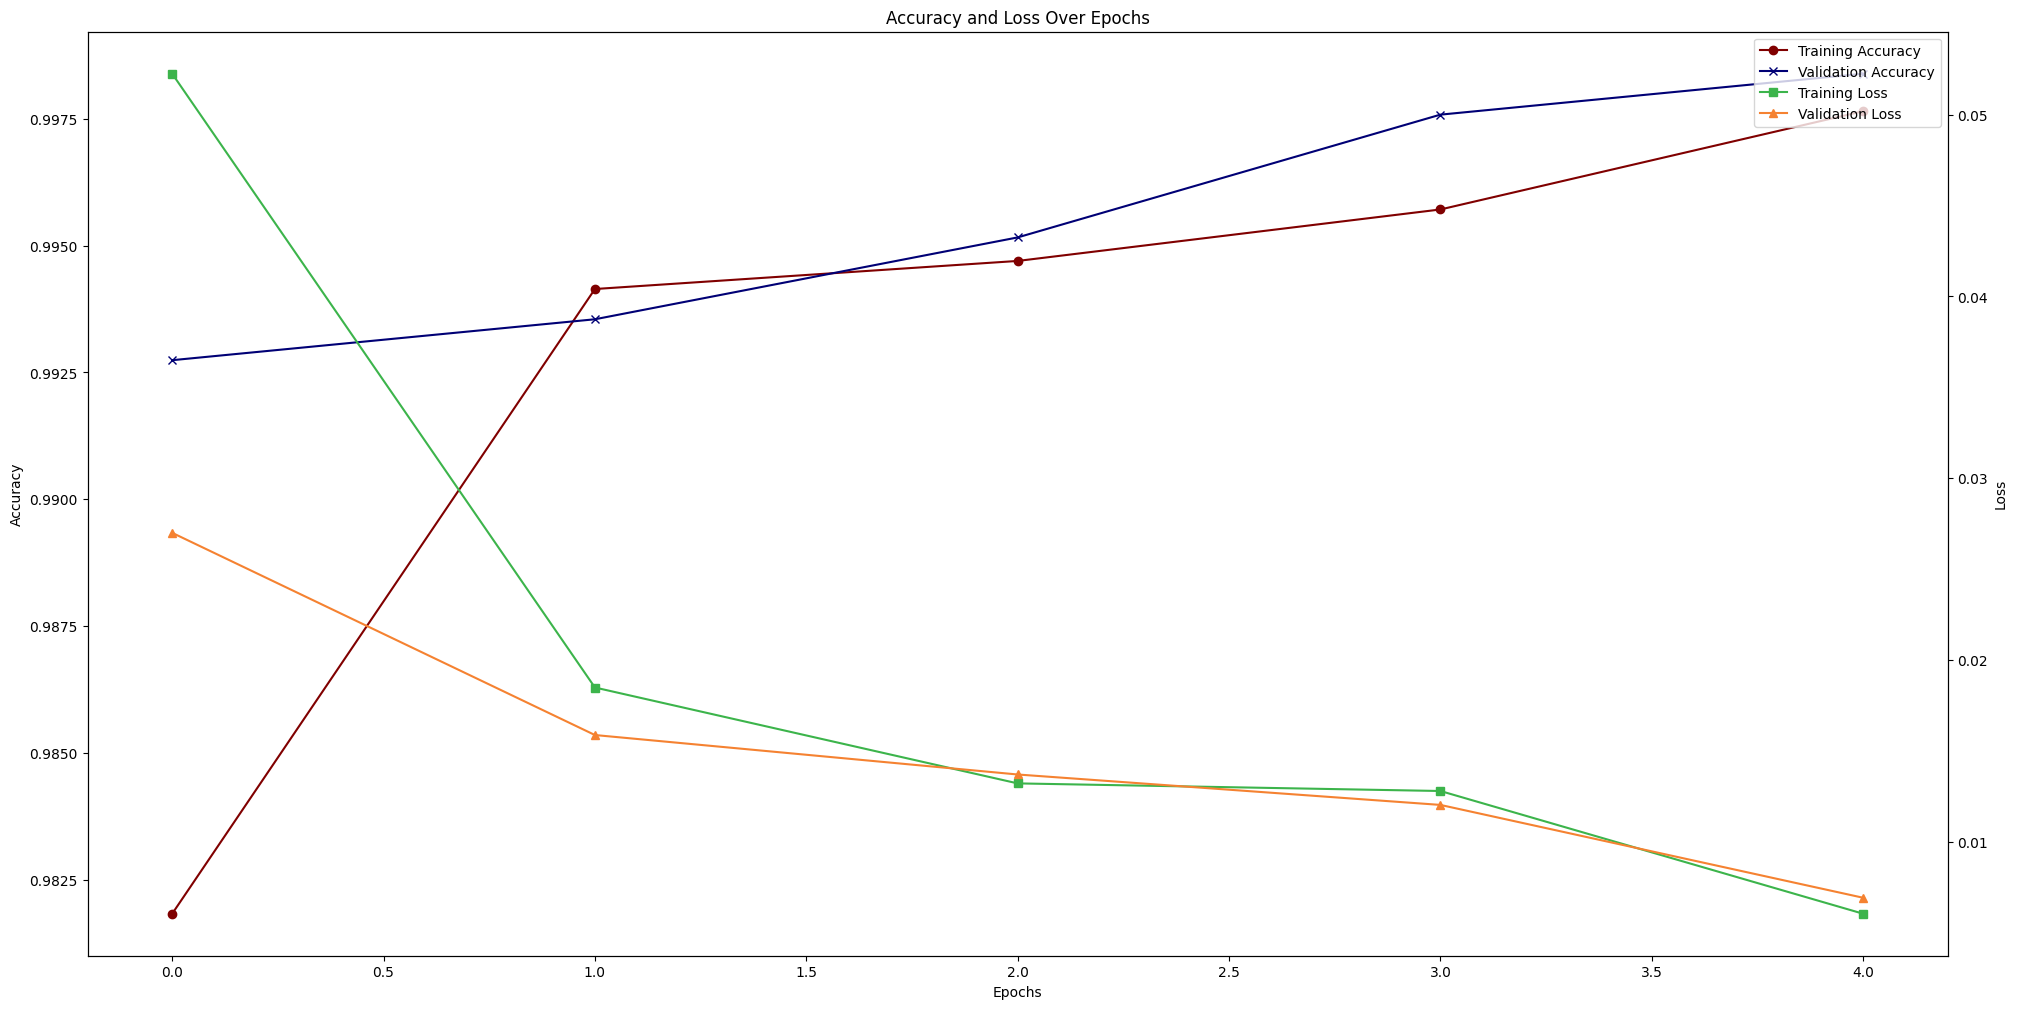

In [23]:
accuracy_loss_plot(history, 'without_tuning')

### Learning curves

Let's take a look at the learning curves of the training and validation accuracy/loss when using the MobileNet base model as a fixed feature extractor.

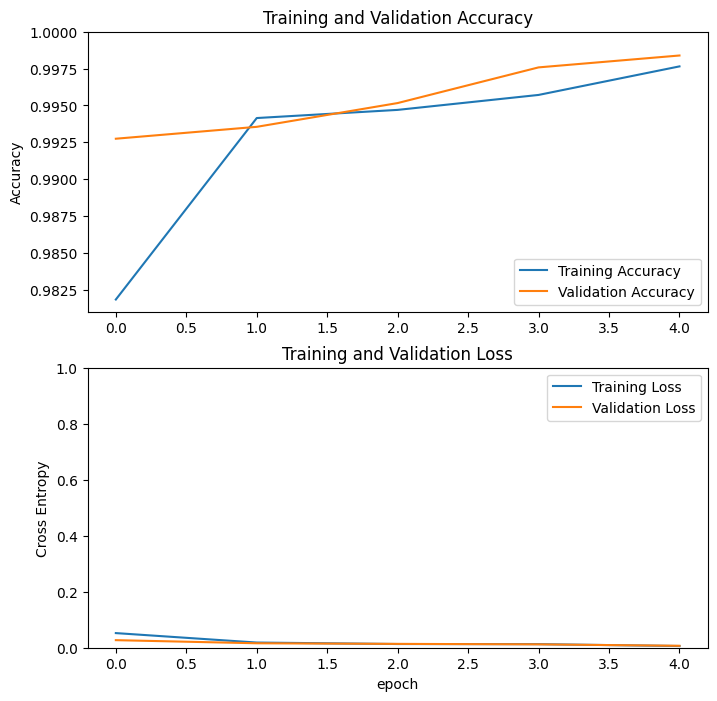

In [24]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [25]:
#train acuracy

print("Train Accuracy: ", history.history['accuracy'])
print("Validation Accuracy: ", history.history['val_accuracy'])

print("Train Loss: ", history.history['loss'])
print("Validation Loss: ", history.history['val_loss'])


Train Accuracy:  [0.9818341135978699, 0.9941444993019104, 0.9946977496147156, 0.9957121014595032, 0.9976485967636108]
Validation Accuracy:  [0.9927419424057007, 0.9935483932495117, 0.9951612949371338, 0.9975806474685669, 0.9983870983123779]
Train Loss:  [0.05225096642971039, 0.018489990383386612, 0.013215893879532814, 0.012797340750694275, 0.006047132890671492]
Validation Loss:  [0.026997212320566177, 0.015875831246376038, 0.013705347664654255, 0.01203229557722807, 0.0069257584400475025]


### Fine Tuning

In [26]:
base_model.trainable = True

In [27]:
# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model.layers))

# Fine-tune from this layer onwards
fine_tune_at = 100

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable = False

Number of layers in the base model:  154


### Compile the model
As you are training a much larger model and want to readapt the pretrained weights, it is important to use a lower learning rate at this stage. Otherwise, your model could overfit very quickly.

In [28]:
model.compile(loss='categorical_crossentropy',
              optimizer = tf.keras.optimizers.RMSprop(learning_rate=base_model_learning_rate/10),
              metrics=[tf.keras.metrics.CategoricalCrossentropy(), 'accuracy', 'top_k_categorical_accuracy'])

In [29]:
model.summary()
len(model.trainable_variables)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[0][0]']        

58

### Continue Train the model

In [30]:
fine_tune_epochs = 5
total_epochs =  initial_epochs + fine_tune_epochs

history_fine = model.fit(train_flow_mobilenet,
                                   epochs=total_epochs,
                                   initial_epoch=history.epoch[-1],
                                   verbose=1,
                                   validation_data=val_flow_mobilenet,
                                   validation_steps=math.ceil(val_flow_mobilenet.samples / val_flow_mobilenet.batch_size),
                                   steps_per_epoch=math.ceil(train_flow_mobilenet.samples / train_flow_mobilenet.batch_size),
                                   callbacks=[checkpoint, early, tb, csv_logger])

Epoch 5/10
339/339 [==============================] - ETA: 0s - loss: 0.0250 - categorical_crossentropy: 0.0250 - accuracy: 0.9929 - top_k_categorical_accuracy: 1.0000
Epoch 5: loss did not improve from 0.00605
339/339 [==============================] - 696s 2s/step - loss: 0.0250 - categorical_crossentropy: 0.0250 - accuracy: 0.9929 - top_k_categorical_accuracy: 1.0000 - val_loss: 0.0675 - val_categorical_crossentropy: 0.0675 - val_accuracy: 0.9927 - val_top_k_categorical_accuracy: 1.0000
Epoch 6/10
339/339 [==============================] - ETA: 0s - loss: 0.0036 - categorical_crossentropy: 0.0036 - accuracy: 0.9988 - top_k_categorical_accuracy: 1.0000
Epoch 6: loss improved from 0.00605 to 0.00357, saving model to top_layers.mn.hdf5
339/339 [==============================] - 685s 2s/step - loss: 0.0036 - categorical_crossentropy: 0.0036 - accuracy: 0.9988 - top_k_categorical_accuracy: 1.0000 - val_loss: 0.0082 - val_categorical_crossentropy: 0.0082 - val_accuracy: 0.9984 - val_top_k

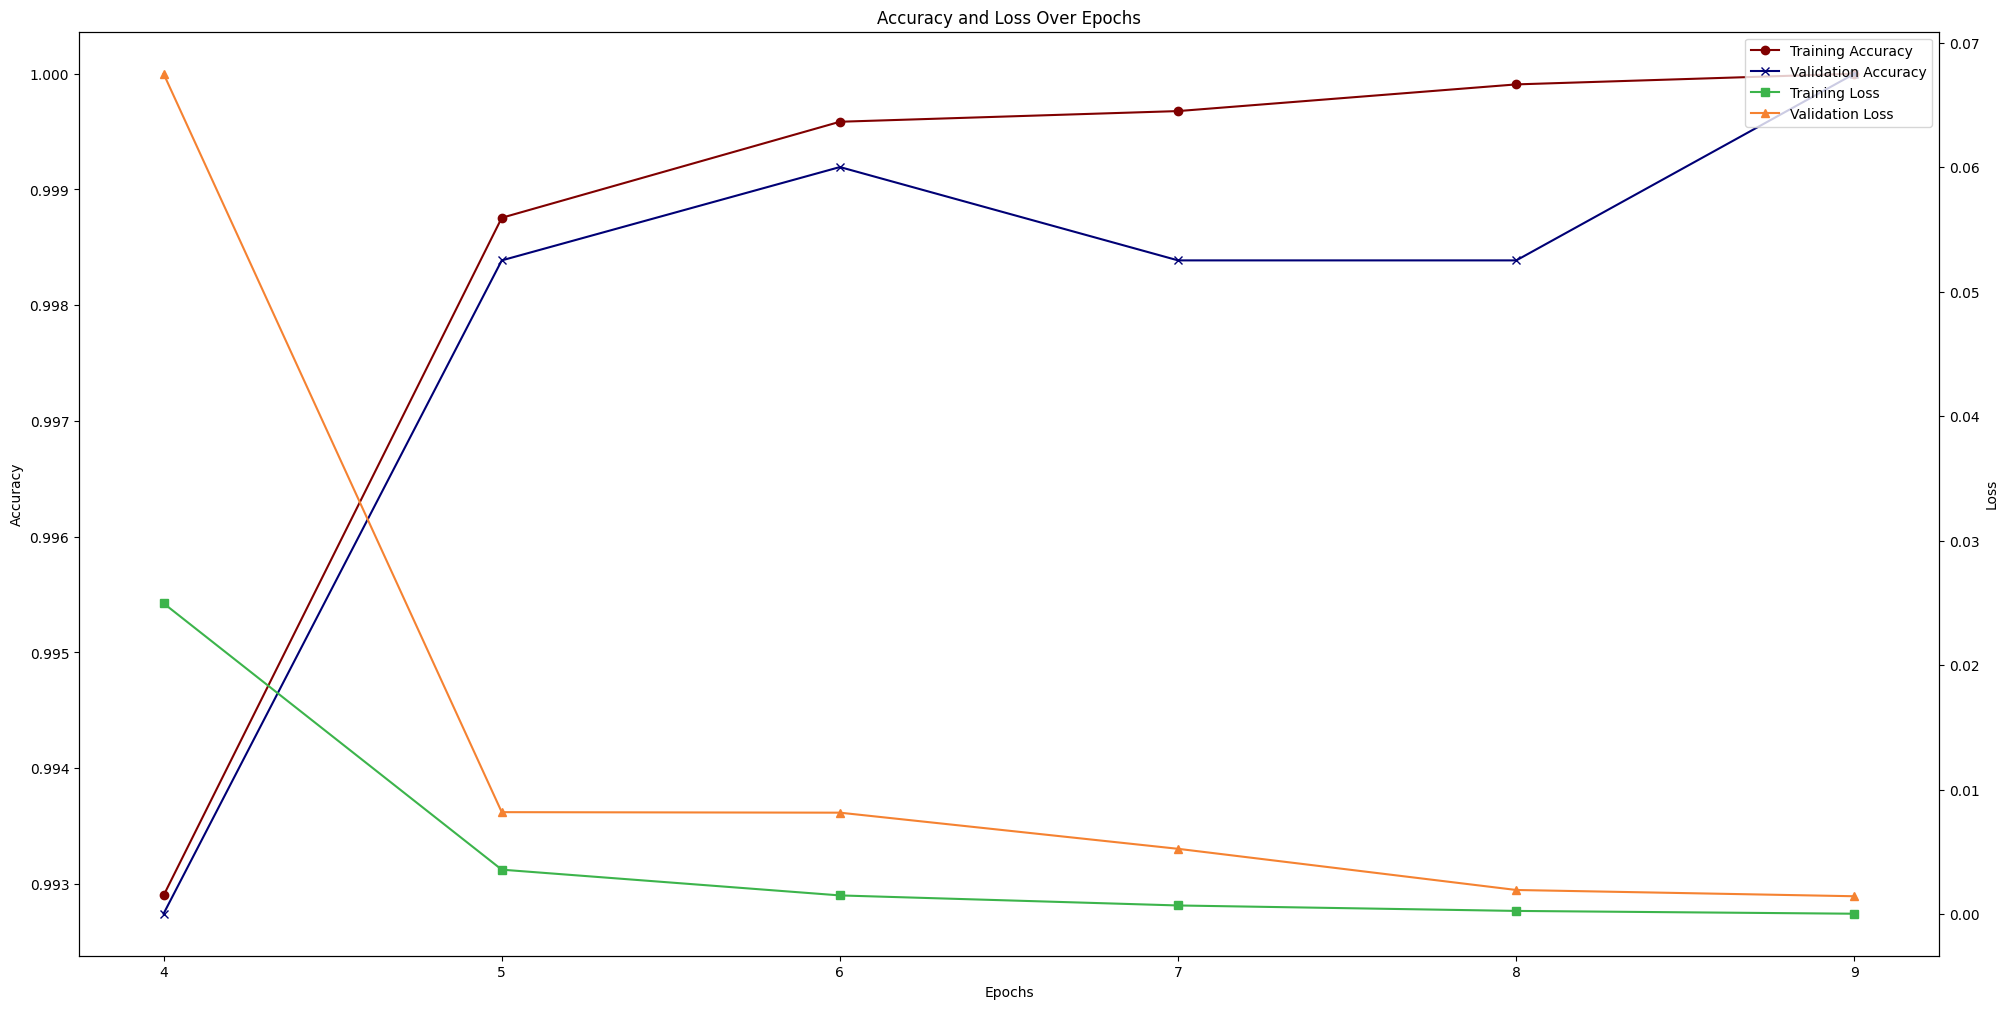

In [31]:
accuracy_loss_plot(history_fine, 'with_tuning')

### Learning curves

In [39]:
acc = history_fine.history['accuracy']
val_acc = history_fine.history['val_accuracy']

loss = history_fine.history['loss']
val_loss = history_fine.history['val_loss']

print("accuracy: ",acc)
print("val accuracy: ", val_acc)

print("loss: ",loss)
print("val loss: ",val_loss)

accuracy:  [0.9928996562957764, 0.998755156993866, 0.9995850324630737, 0.9996772408485413, 0.9999077916145325, 1.0]
val accuracy:  [0.9927419424057007, 0.9983870983123779, 0.999193549156189, 0.9983870983123779, 0.9983870983123779, 1.0]
loss:  [0.024970799684524536, 0.0035740858875215054, 0.0015047910856083035, 0.0006975461728870869, 0.0002596488920971751, 3.4399054129607975e-05]
val loss:  [0.06751349568367004, 0.008193823508918285, 0.008152134716510773, 0.005248067434877157, 0.0019413307309150696, 0.0014381350483745337]


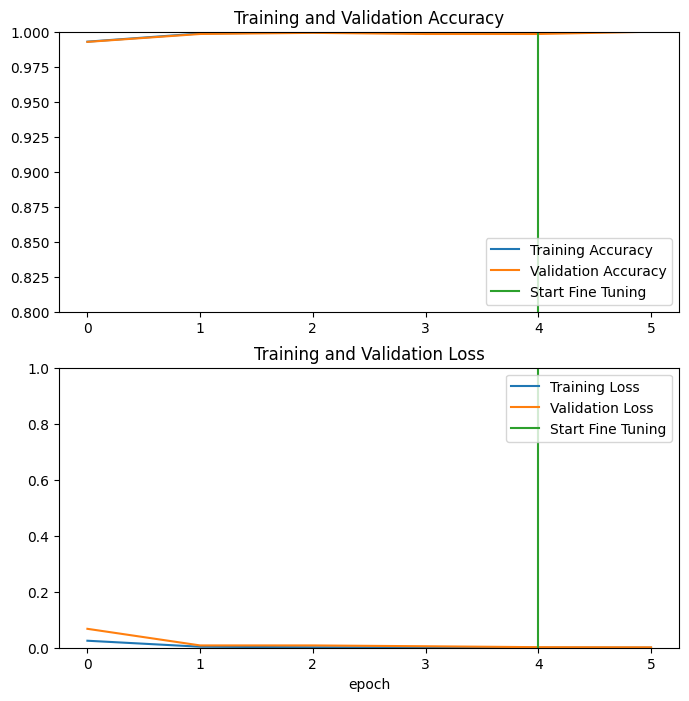

In [40]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([0.8, 1])
plt.plot([initial_epochs-1,initial_epochs-1],
          plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylim([0, 1.0])
plt.plot([initial_epochs-1,initial_epochs-1],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

### Evaluate the model

In [41]:
# Evaluate the test accuracy
result = model.evaluate(test_flow_mobilenet,
                                   verbose=True,
                                   steps=math.ceil(test_flow_mobilenet.samples / test_flow_mobilenet.batch_size))

# Extract loss and accuracy from the result
loss, acc = result[0], result[2]

print("Loss:", loss)
print("Accuracy:", acc)

26/26 [==============================] - 35s 1s/step - loss: 2.8778 - categorical_crossentropy: 2.8778 - accuracy: 0.7854 - top_k_categorical_accuracy: 1.0000
Loss: 2.8777809143066406
Accuracy: 0.7854050993919373


In [42]:
print(model.metrics_names)
target_names = ['dear', 'fox','pig']

['loss', 'categorical_crossentropy', 'accuracy', 'top_k_categorical_accuracy']


In [50]:
# Assuming model is your trained model and test_flow_mobilenet is your test data generator
predictions = model.predict(test_flow_mobilenet, steps=len(test_flow_mobilenet), verbose=1)


17/17 [==============================] - 24s 1s/step


In [51]:

from sklearn.metrics import confusion_matrix

predictions = np.argmax(predictions, axis=1)
print('Confusion Matrix')
conf_matrix_res = confusion_matrix(test_flow_mobilenet.classes, predictions)
cm_res = np.array2string(conf_matrix_res)
print(conf_matrix_res)

Confusion Matrix
[[460  56 232]
 [ 46   5  19]
 [153   8  92]]


In [52]:
import sklearn.metrics as metrics
val_trues =test_flow_mobilenet.classes
print(val_trues)
print(predictions)

[0 0 0 ... 2 2 2]
[0 2 0 ... 1 2 0]


In [53]:
from sklearn.metrics import classification_report
print(classification_report(val_trues, predictions,target_names = target_names))

              precision    recall  f1-score   support

        dear       0.70      0.61      0.65       748
         fox       0.07      0.07      0.07        70
         pig       0.27      0.36      0.31       253

    accuracy                           0.52      1071
   macro avg       0.35      0.35      0.34      1071
weighted avg       0.56      0.52      0.53      1071


In [54]:
model. load_weights (top_layers_file_path)

In [55]:
#save weights of trained model to seperate folder
model.save_weights('mobilenetv2_weights.h5')

In [58]:
#save trained model
model.save('mobilenetv2.h5')

In [59]:
#converting model to tflite and save it
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
open("mobilenetv2.tflite", "wb").write(tflite_model)


INFO:tensorflow:Assets written to: C:\Users\sumeela\AppData\Local\Temp\tmp_x9azjyl\assets


INFO:tensorflow:Assets written to: C:\Users\sumeela\AppData\Local\Temp\tmp_x9azjyl\assets


14117388